In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def make_data():
    data = []
    low = np.random.random_sample((20, 2)) - .5
    high = np.random.random_sample((20, 2)) + .5
    data.append(low)
    data.append(high)
    input_data = np.asarray(data)
    return input_data

In [22]:
input_data = make_data()

In [23]:
#input_data

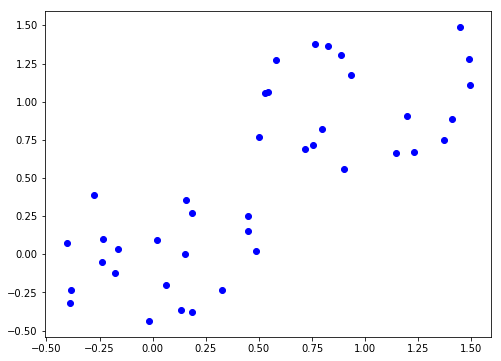

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(input_data[0,:,0], input_data[0,:,1], c='blue')
plt.scatter(input_data[1,:,0], input_data[1,:,1], c='blue')

## Goal of K-Means

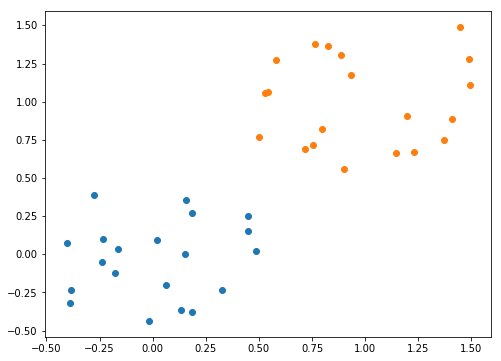

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(input_data[0,:,0], input_data[0,:,1])
plt.scatter(input_data[1,:,0], input_data[1,:,1])

In [26]:
def euclidean_distance(a, b):   
    return np.sqrt(np.sum((a - b)**2))

In [27]:
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [28]:
class Plot():
    def __init__(self): 
        self.cmap = plt.get_cmap('viridis')

    def _transform(self, X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        # Sort eigenvalues and eigenvector by largest eigenvalues
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]
        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed


    def plot_regression(self, lines, title, axis_labels=None, mse=None, scatter=None, legend={"type": "lines", "loc": "lower right"}):
        
        if scatter:
            scatter_plots = scatter_labels = []
            for s in scatter:
                scatter_plots += [plt.scatter(s["x"], s["y"], color=s["color"], s=s["size"])]
                scatter_labels += [s["label"]]
            scatter_plots = tuple(scatter_plots)
            scatter_labels = tuple(scatter_labels)

        for l in lines:
            li = plt.plot(l["x"], l["y"], color=s["color"], linewidth=l["width"], label=l["label"])

        if mse:
            plt.suptitle(title)
            plt.title("MSE: %.2f" % mse, fontsize=10)
        else:
            plt.title(title)

        if axis_labels:
            plt.xlabel(axis_labels["x"])
            plt.ylabel(axis_labels["y"])

        if legend["type"] == "lines":
            plt.legend(loc="lower_left")
        elif legend["type"] == "scatter" and scatter:
            plt.legend(scatter_plots, scatter_labels, loc=legend["loc"])

        plt.show()

In [33]:
k = 2
max_iterations = 500

def random_centroids(X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((k, n_features))
        for i in range(k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids
    
def closest_centroid(sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i

def create_clusters(centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = _closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters
    
def calculate_centroids(clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids
    
def get_cluster_labels(clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred
    
def predict(X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = random_centroids(X)

        # Iterate until convergence or for max iterations
        for _ in range(max_iterations):
            # Assign samples to closest centroids (create clusters)
            clusters = create_clusters(centroids, X)
            # Save current centroids for convergence check
            prev_centroids = centroids
            # Calculate new centroids from the clusters
            centroids = calculate_centroids(clusters, X)
            # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break

        return get_cluster_labels(clusters, X)

In [34]:
random_centroids(input_data)

ValueError: too many values to unpack (expected 2)